In [ ]:
# DATASET LINK: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import ast

import plotly
import plotly.express as px
import plotly.graph_objs as gobj
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import nltk
from nltk.stem.porter import PorterStemmer

from warnings import simplefilter
simplefilter("ignore")

import os


# Change directory to where the dataset is stored
os.chdir('/content/imdb dataset')  # Replace <folder_name> with the path to your dataset



# Load the dataset
movies = pd.read_csv('movies_metadata.csv')  # Adjust the path if needed

pd.set_option('display.max_columns', None)
movies.head()


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
print('The dataset has {} rows and {} columns.'.format(movies.shape[0],movies.shape[1]))

The dataset has 45466 rows and 24 columns.


In [4]:
movies.isna().sum()

,0
adult,0
belongs_to_collection,40972
budget,0
genres,0
homepage,37684
id,0
imdb_id,17
original_language,11
original_title,0
overview,954


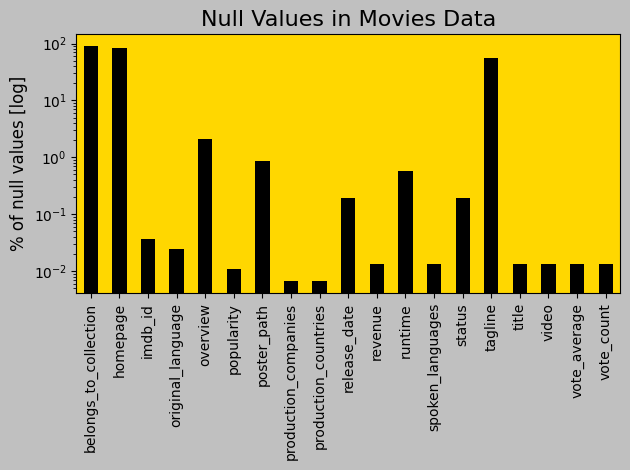

In [5]:
nulls_movies = movies.apply(lambda x:x.isnull().value_counts()).T[True]/len(movies)*100
nulls_movies = nulls_movies[~np.isnan(nulls_movies)].to_frame()

nulls_movies.plot(kind='bar',color='black',legend=None)

plt.xlabel('')
plt.ylabel('% of null values [log]',fontsize=12)
plt.yscale('log')
plt.title('Null Values in Movies Data',fontsize=16)
plt.xticks(fontsize=10)

plt.tight_layout()
plt.gcf().patch.set_facecolor('silver')
plt.gca().set_facecolor('gold')
plt.show()

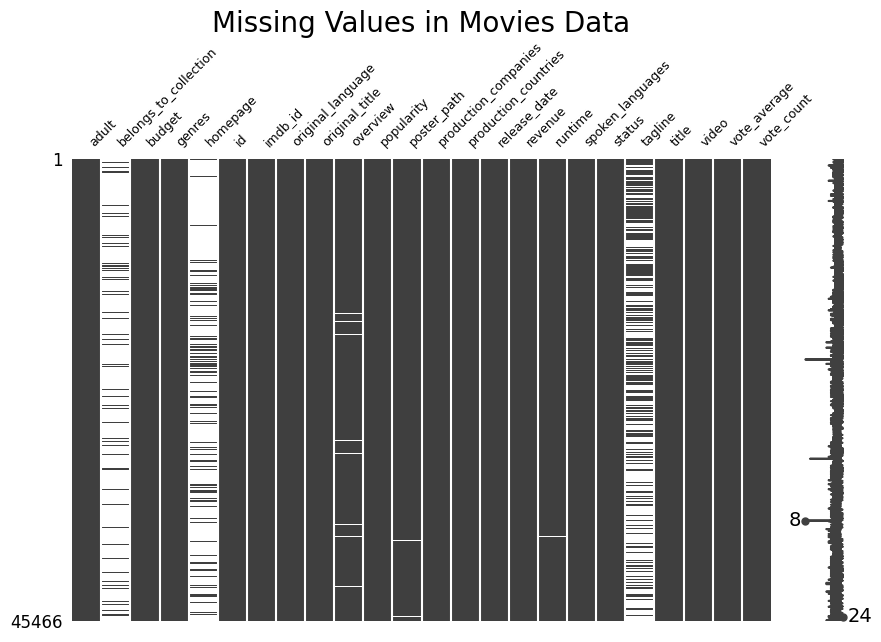

In [6]:
msno.matrix(movies,figsize=(10, 6))
plt.title('Missing Values in Movies Data',fontsize=20)
plt.xticks(fontsize=9)
plt.yticks(fontsize=12)
plt.show();

In [7]:
if movies.duplicated().values.any():
    print("The dataset has duplicate entries.")
else:
    print('No duplicate entries in the dataframe.')

The dataset has duplicate entries.


In [8]:
movies = movies.drop_duplicates()

print('The dataset has {} rows and {} columns.'.format(movies.shape[0],movies.shape[1]))

The dataset has 45453 rows and 24 columns.


In [9]:
movies['id'].duplicated().value_counts()

,count
id,
False,45436
True,17


In [10]:
duplicateCheck = movies.duplicated(subset=['id'],keep='last')

print('No. of duplicates: {}'.format(len(movies[duplicateCheck])))
print()
print(movies[duplicateCheck]['title'])

No. of duplicates: 17

838                                             Wife
949                               A Farewell to Arms
2564                            A Place at the Table
4114                   Pokémon: Spell of the Unknown
4356                            Camille Claudel 1915
5130                                   Clockstoppers
5535     Pokémon 4Ever: Celebi - Voice of the Forest
5710                                 Rich and Famous
5865                 Confessions of a Dangerous Mind
9576                        The Phantom of the Opera
10419                                         Bubble
11155                                     Black Gold
11342                                        Offside
13220               Why We Fight: Divide and Conquer
13946                           Seven Years Bad Luck
16167                                     The Viking
24164                                  Force Majeure
Name: title, dtype: object


In [23]:
movies = movies.drop(movies[duplicateCheck].index)

len(movies)

44985

In [24]:
movies = movies.drop('title', axis=1) # Replace 'title' with your desired column name if needed.

len(movies)

44985

In [25]:
# Check the existing columns in your DataFrame
print(movies.columns)

# Assuming the column names are correct and exist in the DataFrame,
# the following code should work:

# Drop the columns
try:
    movies = movies.drop(columns=['imdb_id', 'poster_path', 'video'], axis=1)
except KeyError as e:
    print(f"Error dropping columns: {e}")
    print("Columns in the DataFrame:", movies.columns)

# Check the length of the DataFrame after dropping the columns
len(movies)

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'tagline', 'vote_average', 'vote_count',
       'languages'],
      dtype='object')
Error dropping columns: "['imdb_id', 'poster_path', 'video'] not found in axis"
Columns in the DataFrame: Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'tagline', 'vote_average', 'vote_count',
       'languages'],
      dtype='object')


44985

In [28]:
# Check if 'status' column exists in the DataFrame
if 'status' in movies.columns:
    # If it exists, proceed with your value_counts() operation
    status_counts = movies['status'].value_counts()
    print(status_counts)
else:
    # If it doesn't exist, print an informative message
    print("The 'status' column is not present in the DataFrame.")
    # Consider reloading your data or investigating why it's missing

The 'status' column is not present in the DataFrame.


In [29]:
# Check the existing columns in your DataFrame
print(movies.columns)

# Assuming the column names are correct and exist in the DataFrame,
# the following code should work:

# Drop the columns
try:
    # This line was causing issues because 'status' was likely dropped earlier
    # movies = movies.drop(columns=['imdb_id', 'poster_path', 'video'], axis=1)
    # Let's only drop the other columns and keep 'status'
    movies = movies.drop(columns=['imdb_id', 'poster_path', 'video'], errors='ignore')
except KeyError as e:
    print(f"Error dropping columns: {e}")
    print("Columns in the DataFrame:", movies.columns)

# Check the length of the DataFrame after dropping the columns
len(movies)

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'tagline', 'vote_average', 'vote_count',
       'languages'],
      dtype='object')


44985

Now I can drop the column *status*.

In [38]:
# Check if the 'status' column exists before attempting to drop it.
if 'status' in movies.columns:
    movies.drop('status', axis=1, inplace=True)
else:
    print("The 'status' column is not present in the DataFrame, skipping drop.")

The 'status' column is not present in the DataFrame, skipping drop.


In [17]:
movies['spoken_languages'][1]

"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]"

In [31]:
# Check if 'status' column exists before dropping
if 'status' in movies.columns:
    movies.drop('status', axis=1, inplace=True)
else:
    print("The 'status' column is not present in the DataFrame, skipping drop.")

The 'status' column is not present in the DataFrame, skipping drop.


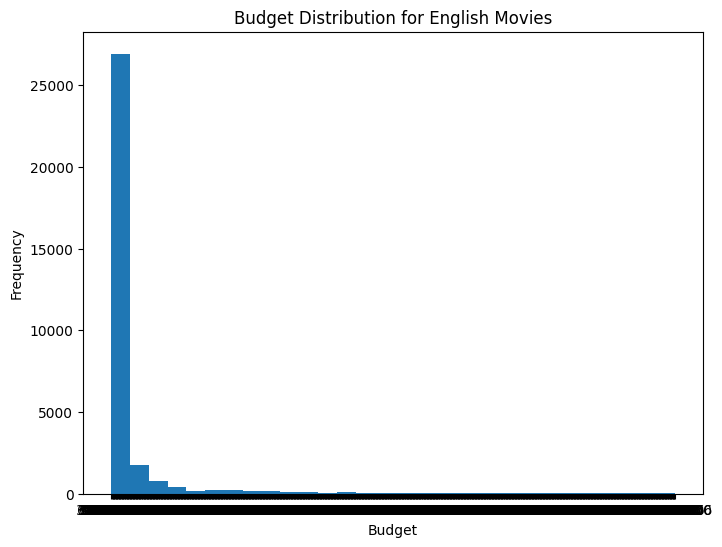

In [33]:
# prompt: output not generated

# Assuming 'movies' DataFrame is already defined and loaded as in the provided code.

# ... (Your existing code) ...


# Example usage:
# Assuming you want to create a plot for movies with original language 'en'
if 'original_language' in movies.columns:
    movies_en = movies[movies['original_language'] == 'en']
    # Example plot (replace with your desired visualization)
    plt.figure(figsize=(8, 6))
    plt.hist(movies_en['budget'].dropna(), bins=30)  # Assuming 'budget' column is numeric
    plt.xlabel("Budget")
    plt.ylabel("Frequency")
    plt.title("Budget Distribution for English Movies")
    plt.show()

else:
    print("The 'original_language' column is not found in the DataFrame.")

# ... (rest of your code) ...

In [34]:
### Create column 'day of week' ###
movies['day_of_week'] = pd.to_datetime(movies['release_date']).dt.strftime("%A")

### Create column 'month' ###
movies['month'] = pd.to_datetime(movies['release_date']).dt.strftime("%b")

### Create column 'season' ###
Q1 = ['Jan','Feb','Mar']
Q2 = ['Apr','May','Jun']
Q3 = ['Jul','Aug','Sep']
Q4 = ['Oct','Nov','Dec']

def month_handler(row):
    if row['month'] in Q1:
        return 'Q1'
    if row['month'] in Q2:
        return 'Q2'
    if row['month'] in Q3:
        return 'Q3'
    if row['month'] in Q4:
        return 'Q4'

movies['season'] = movies.apply(month_handler,axis=1)

### Create column 'year' ###
movies['year'] = pd.to_datetime(movies['release_date']).dt.strftime("%Y")

movies.head(2)

,adult,belongs_to_collection,budget,genres,homepage,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,vote_average,vote_count,languages,day_of_week,month,season,year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,NaN,7.7,5415.0,,Monday,Oct,Q4,1995
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Roll the dice and unleash the excitement!,6.9,2413.0,,Friday,Dec,Q4,1995


In [35]:
movies.loc[movies['release_date'].isnull(),'release_date'] = 'not available'
movies.loc[movies['day_of_week'].isnull(),'day_of_week'] = 'not available'
movies.loc[movies['month'].isnull(),'month'] = 'not available'
movies.loc[movies['season'].isnull(),'season'] = 'not available'
movies.loc[movies['year'].isnull(),'year'] = '0'

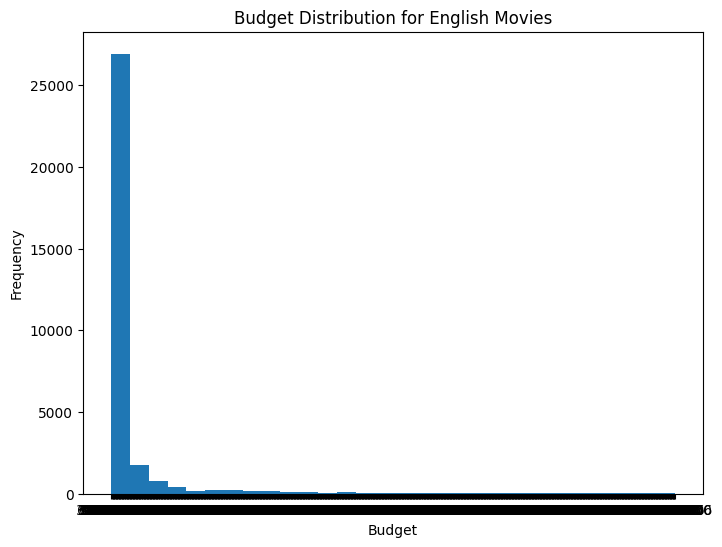

In [36]:
# prompt: output not generated

# Assuming 'movies' DataFrame is already defined and loaded as in the provided code.

# ... (Your existing code) ...

# Example usage:
# Assuming you want to create a plot for movies with original language 'en'
if 'original_language' in movies.columns:
    movies_en = movies[movies['original_language'] == 'en']
    # Example plot (replace with your desired visualization)
    plt.figure(figsize=(8, 6))
    plt.hist(movies_en['budget'].dropna(), bins=30)  # Assuming 'budget' column is numeric
    plt.xlabel("Budget")
    plt.ylabel("Frequency")
    plt.title("Budget Distribution for English Movies")
    plt.show()

else:
    print("The 'original_language' column is not found in the DataFrame.")

# ... (rest of your code) ...

In [37]:
movies_homepage = movies.dropna(subset=['homepage'])
movies_no_homepage = movies[movies['homepage'].isnull()]

len(movies_homepage), len(movies_no_homepage)

(7701, 37284)

In [ ]:
movies_homepage.describe()

,revenue,runtime,vote_average,vote_count
count,7.701000e+03,7701.000000,7701.000000,7701.000000
mean,3.784797e+07,97.830152,5.949448,346.369822
std,1.355041e+08,36.939680,1.680657,1022.382653
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,86.000000,5.400000,6.000000
50%,0.000000e+00,95.000000,6.200000,20.000000
75%,1.473809e+06,109.000000,7.000000,139.000000
max,2.787965e+09,900.000000,10.000000,14075.000000


In [ ]:
movies_no_homepage.describe()

,revenue,runtime,vote_average,vote_count
count,3.728400e+04,37033.000000,37284.000000,37284.000000
mean,5.843424e+06,93.528286,5.556611,62.297742
std,3.281780e+07,38.614962,1.954298,253.951018
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,9.000000
75%,0.000000e+00,106.000000,6.800000,28.000000
max,8.766885e+08,1256.000000,10.000000,8670.000000


In [ ]:
print('The average revenues of movies with homepage are {:.0f} M$; those of movies with no homepage are {:.0f} M$.'.format(movies_homepage['revenue'].mean()/10**6,movies_no_homepage['revenue'].mean()/10**6))

The average revenues of movies with homepage are 38 M$; those of movies with no homepage are 6 M$.


In [ ]:
print('The average rating of movies with homepage is {:.1f}; that of movies with no homepage is {:.1f}.'.format(movies_homepage['vote_average'].mean(),movies_no_homepage['vote_average'].mean()))

The average rating of movies with homepage is 5.9; that of movies with no homepage is 5.6.


In [ ]:
print('Mode value for the release year of movies with/without a home page: {}, {}.'.format(movies_homepage['year'].mode()[0],movies_no_homepage['year'].mode()[0]))

Mode value for the release year of movies with/without a home page: 2011, 2014.


In [ ]:
movies.loc[movies['homepage'].isnull(),'has_homepage'] = 'NO'
movies.loc[~movies['homepage'].isnull(),'has_homepage'] = 'YES'

movies = movies.drop(['homepage'],axis=1)

In [ ]:
movies['has_homepage'].value_counts()

has_homepage
NO     37284
YES     7701
Name: count, dtype: int64

In [ ]:
movies['belongs_to_collection'][0]

"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"

In [ ]:
movies['genres'][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

**Fill the Remaining Nulls**

In [ ]:
movies_country = {}
movies_country['world except USA'] = 0

for country_list in movies['countries']:
    for country in country_list:
        if country not in movies_country:
            movies_country[country] = 0
        movies_country[country] += 1
        if country != 'United States of America':
            movies_country['world except USA'] += 1

top10_countries = sorted(movies_country,key=movies_country.get,reverse=True)[:11]

top10_list = []
for country in top10_countries:
    top10_list.append((country,movies_country[country]))

top10_list

[('world except USA', 27985),
 ('United States of America', 21005),
 ('United Kingdom', 4074),
 ('France', 3893),
 ('Germany', 2235),
 ('Italy', 2144),
 ('Canada', 1744),
 ('Japan', 1638),
 ('Spain', 956),
 ('Russia', 903),
 ('India', 821)]

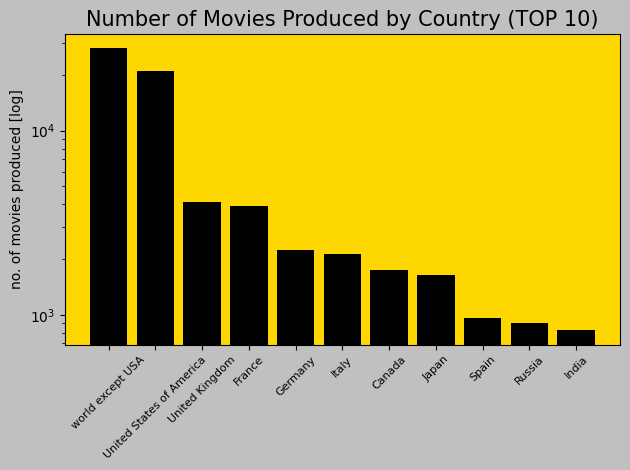

In [ ]:
xval = [x[0] for x in top10_list]
yval = [x[1] for x in top10_list]

plt.bar(x=xval,height=yval,color='black')

plt.xlabel('')
plt.ylabel('no. of movies produced [log]',fontsize=10)
plt.yscale('log')
plt.title('Number of Movies Produced by Country (TOP 10)',fontsize=15)
plt.xticks(fontsize=8,rotation=45)

plt.tight_layout()
plt.gcf().patch.set_facecolor('silver')
plt.gca().set_facecolor('gold')
plt.show()

<Figure size 1000x700 with 0 Axes>

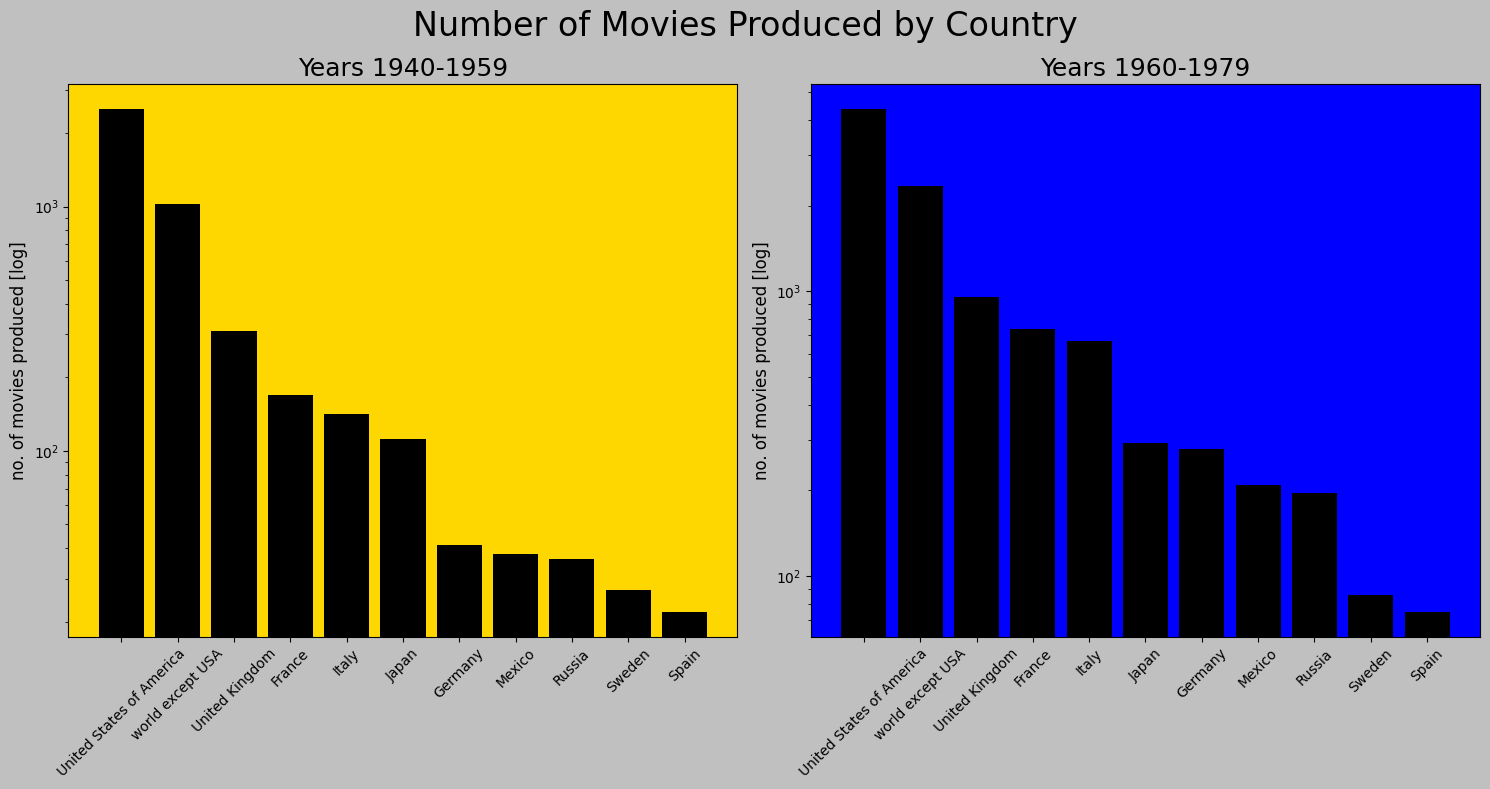

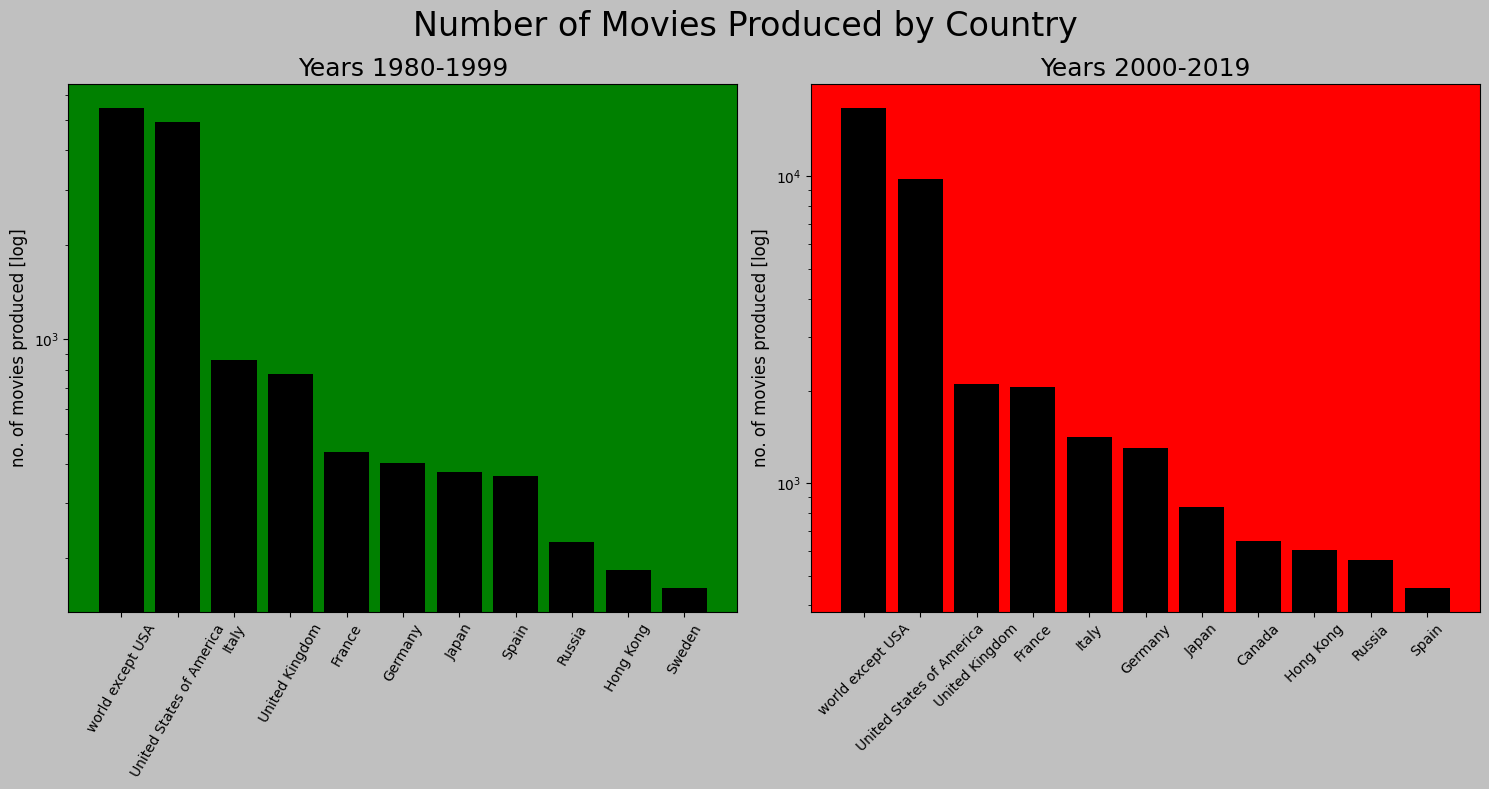

In [ ]:
xval_4060 = [x[0] for x in top10_list_4060]
xval_6080 = [x[0] for x in top10_list_6080]
xval_8000 = [x[0] for x in top10_list_6080]
xval_0020 = [x[0] for x in top10_list_8000]
yval_4060 = [x[1] for x in top10_list_4060]
yval_6080 = [x[1] for x in top10_list_6080]
yval_8000 = [x[1] for x in top10_list_8000]
yval_0020 = [x[1] for x in top10_list_0020]

fig = plt.figure(figsize=(10,7));
(topfig,bottomfig) = fig.subfigures(2,1);

topfig.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4);
fig,axes = plt.subplots(1,2,figsize=(15,8));

axes[0].bar(x=xval_4060,height=yval_4060,color='black');
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45,fontsize=10);
axes[0].set_yscale('log')
axes[0].set_ylabel('no. of movies produced [log]',fontsize=12)
axes[0].set_title('Years 1940-1959',fontsize=18);
axes[0].set_facecolor('gold')

axes[1].bar(x=xval_6080,height=yval_6080,color='black');
axes[1].set_xticklabels(axes[0].get_xticklabels(),rotation=45,fontsize=10);
axes[1].set_yscale('log')
axes[1].set_ylabel('no. of movies produced [log]',fontsize=12)
axes[1].set_title('Years 1960-1979',fontsize=18);
axes[1].set_facecolor('blue')

fig.suptitle("Number of Movies Produced by Country",fontsize=24)
fig.set_facecolor('silver')
plt.tight_layout()


bottomfig.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4);
fig,axes = plt.subplots(1,2,figsize=(15,8));

axes[0].bar(x=xval_8000,height=yval_8000,color='black');
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=60,fontsize=10);
axes[0].set_yscale('log')
axes[0].set_ylabel('no. of movies produced [log]',fontsize=12)
axes[0].set_title('Years 1980-1999',fontsize=18);
axes[0].set_facecolor('green')

axes[1].bar(x=xval_0020,height=yval_0020,color='black');
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45,fontsize=10);
axes[1].set_yscale('log')
axes[1].set_ylabel('no. of movies produced [log]',fontsize=12)
axes[1].set_title('Years 2000-2019',fontsize=18);
axes[1].set_facecolor('red')

fig.suptitle("Number of Movies Produced by Country",fontsize=24)
fig.set_facecolor('silver')
plt.tight_layout()

plt.tight_layout()
plt.show()

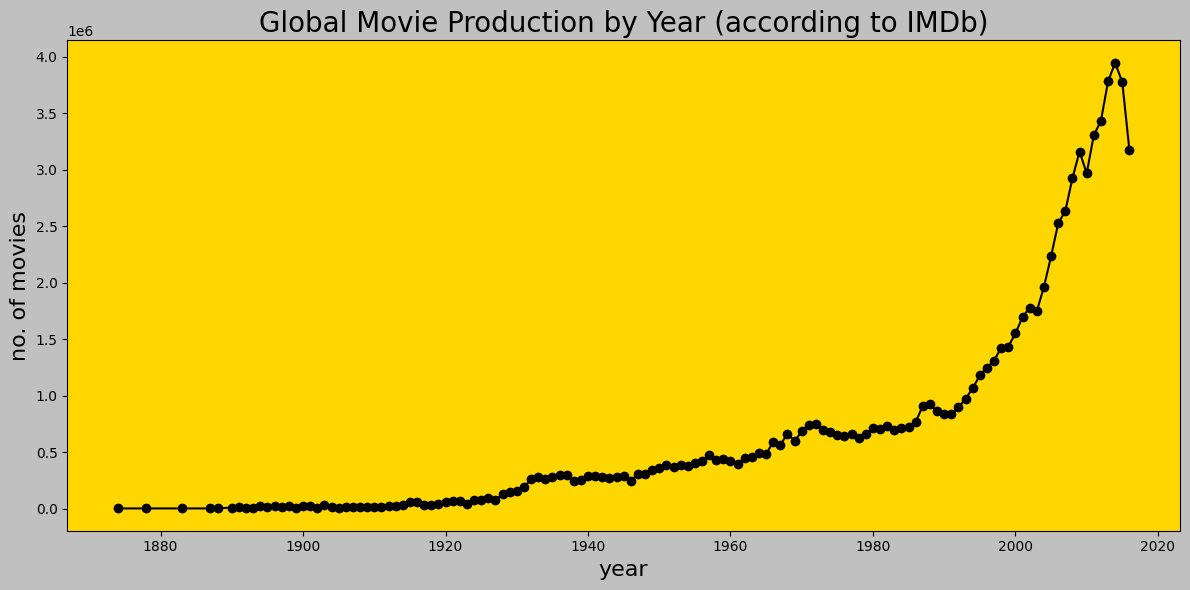

In [ ]:
movies_by_year = movies[(movies['year'] != 0) & (movies['year'] < 2017)].groupby('year')['year'].sum().reset_index(name='TOT/year').sort_values(['TOT/year'],ascending=True)
sorted_movies_year = movies_by_year.sort_values(by='year',ascending=True)

plt.figure(figsize=(12,6))
plt.plot(sorted_movies_year['year'],sorted_movies_year['TOT/year'],'-o',color='black')

plt.xlabel('year',fontsize=16)
plt.ylabel('no. of movies',fontsize=16)
plt.title('Global Movie Production by Year (according to IMDb)',fontsize=20)

plt.tight_layout()
plt.gcf().patch.set_facecolor('silver')
plt.gca().set_facecolor('gold')
plt.show()

#sorted_movies_year

In [ ]:
movie_day = movies[movies['day_of_week'] != 'not available'].groupby('day_of_week')['day_of_week'].count().reset_index(name='TOT movie release/weekday').sort_values(['TOT movie release/weekday'],ascending=False)
movie_month = movies[movies['month'] != 'not available'].groupby('month')['month'].count().reset_index(name='TOT movie release/month').sort_values(['TOT movie release/month'],ascending=False)
movie_season = movies[movies['season'] != 'not available'].groupby('season')['season'].count().reset_index(name='TOT movie release/season').sort_values(['TOT movie release/season'],ascending=False)

movie_day

,day_of_week,TOT movie release/weekday
0,Friday,13761
4,Thursday,7452
6,Wednesday,6958
2,Saturday,5105
5,Tuesday,4594
3,Sunday,3572
1,Monday,3465


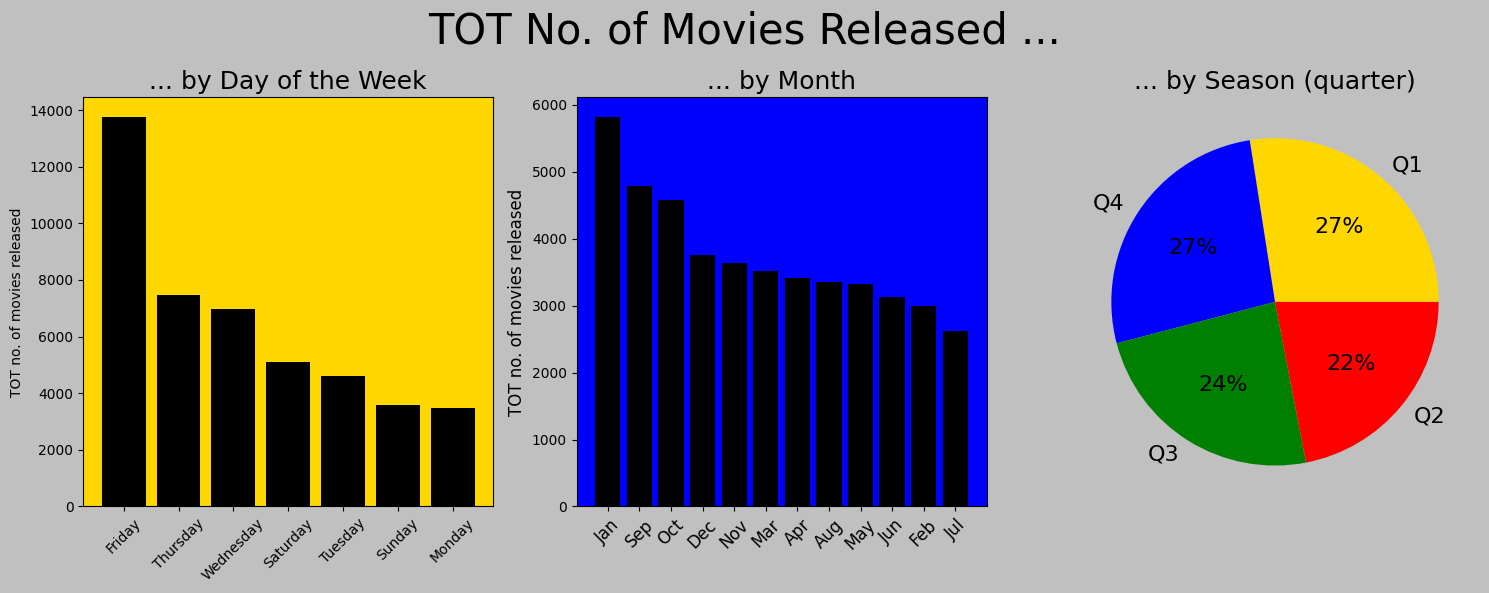

In [ ]:
def label_function(val):
    return f'{val:.0f}%'

labels = movie_season['season']
sizes_season = movie_season['TOT movie release/season']

fig,axes = plt.subplots(1,3,figsize=(15,6));

axes[0].bar(x=movie_day['day_of_week'],height=movie_day['TOT movie release/weekday'],color='black');
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45,fontsize=10);
axes[0].set_ylabel('TOT no. of movies released',fontsize=10)
axes[0].set_title('... by Day of the Week',fontsize=18);
axes[0].set_facecolor('gold')

axes[1].bar(x=movie_month['month'],height=movie_month['TOT movie release/month'],color='black');
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45,fontsize=12);
axes[1].set_ylabel('TOT no. of movies released',fontsize=12)
axes[1].set_title('... by Month',fontsize=18);
axes[1].set_facecolor('blue')

axes[2].pie(sizes_season,labels=labels,autopct=label_function,colors=['gold','blue','green','red'],textprops={'fontsize':16})
axes[2].set_title('... by Season (quarter)',fontsize=18)

fig.suptitle("TOT No. of Movies Released ...",fontsize=30)
fig.set_facecolor('silver')
plt.tight_layout()

In [ ]:
movies_company = {}

for company_list in movies['companies']:
    for company in company_list:
        if company not in movies_company:
            movies_company[company] = 0
        movies_company[company] += 1

top10_companies = sorted(movies_company,key=movies_company.get,reverse=True)[:10]

top10_CMPlist = []
for company in top10_companies:
    top10_CMPlist.append((company,movies_company[company]))

top10_CMPlist

[('Warner Bros.', 1248),
 ('Metro-Goldwyn-Mayer (MGM)', 1073),
 ('Paramount Pictures', 996),
 ('Twentieth Century Fox Film Corporation', 834),
 ('Universal Pictures', 827),
 ('Columbia Pictures Corporation', 447),
 ('Canal+', 433),
 ('Columbia Pictures', 429),
 ('RKO Radio Pictures', 290),
 ('United Artists', 276)]

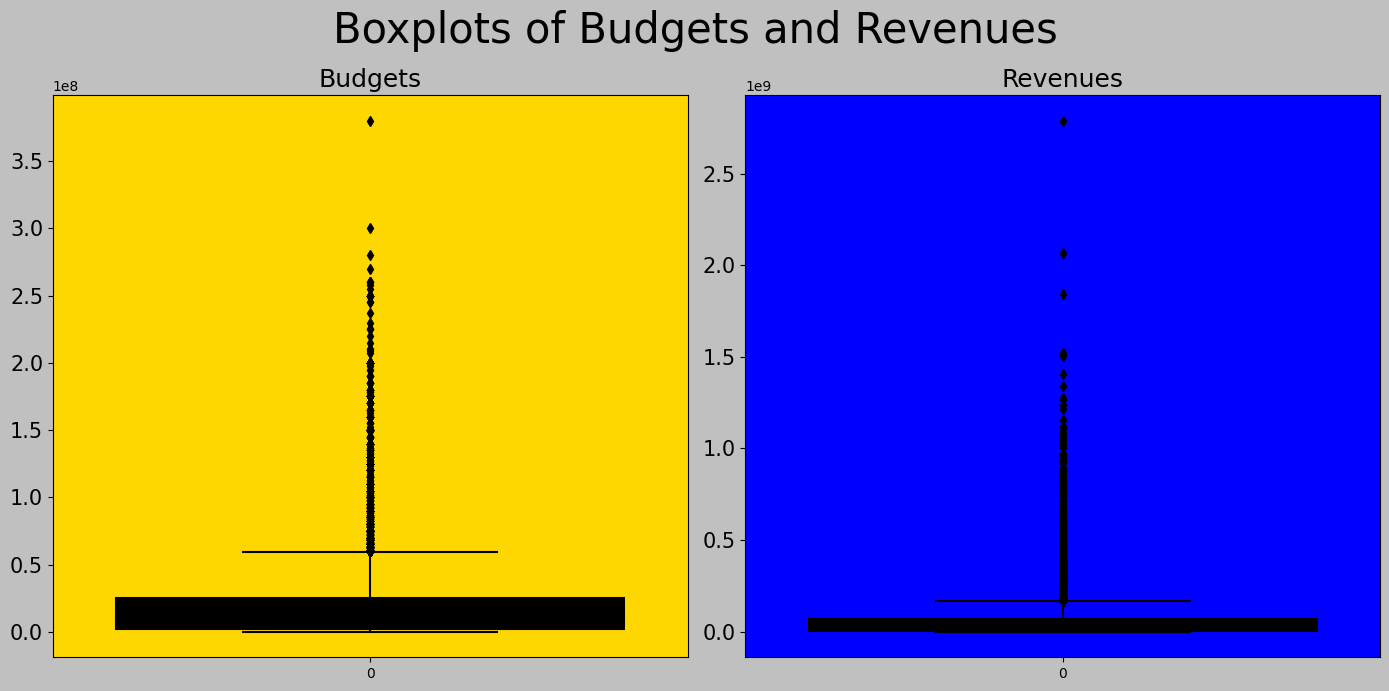

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(14,7))

ax1 = sns.boxplot(movie_budget['budget'],color='black',ax=ax1)
ax1.yaxis.set_tick_params(labelsize=15)
ax1.set_facecolor('gold')
ax1.set_title('Budgets',fontsize=18)

ax2 = sns.boxplot(movie_revenue['revenue'],color='black',ax=ax2)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.set_facecolor('blue')
ax2.set_title('Revenues',fontsize=18)

fig.suptitle("Boxplots of Budgets and Revenues",fontsize=30)

fig.set_facecolor('silver')
plt.tight_layout()

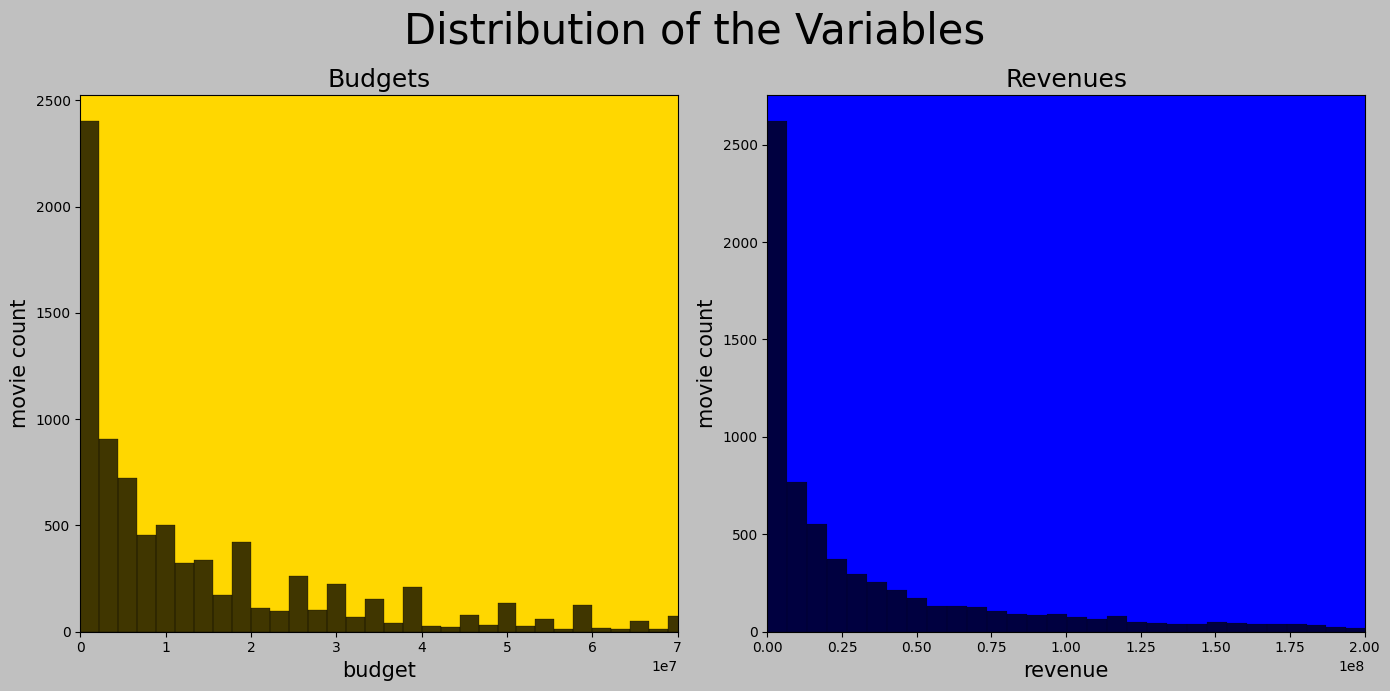

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(14,7))

ax1 = sns.histplot(movie_budget['budget'],color='black',ax=ax1)
ax1.set_xlim(0,7*10**7)
ax1.set_title('Budgets',fontsize=18)
ax1.set_xlabel('budget',fontsize=15)
ax1.set_ylabel('movie count',fontsize=15)
ax1.set_facecolor('gold')

ax2 = sns.histplot(movie_revenue['revenue'],color='black',ax=ax2)
ax2.set_xlim(0,2*10**8)
ax2.set_title('Revenues',fontsize=18)
ax2.set_xlabel('revenue',fontsize=15)
ax2.set_ylabel('movie count',fontsize=15)
ax2.set_facecolor('blue')

fig.suptitle("Distribution of the Variables",fontsize=30)

fig.set_facecolor('silver')
plt.tight_layout()

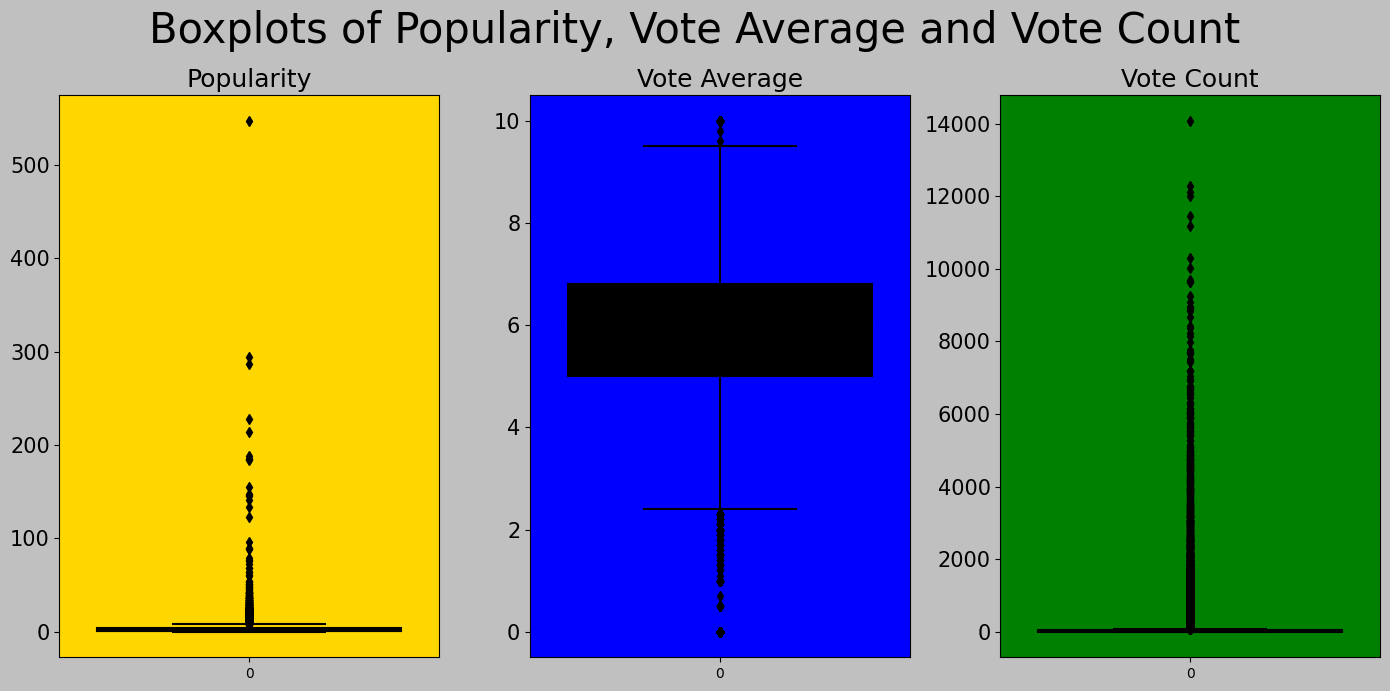

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(14,7))

ax1 = sns.boxplot(movies['popularity'],color='black',ax=ax1)
ax1.yaxis.set_tick_params(labelsize=15)
ax1.set_facecolor('gold')
ax1.set_title('Popularity',fontsize=18)

ax2 = sns.boxplot(movies['vote_average'],color='black',ax=ax2)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.set_facecolor('blue')
ax2.set_title('Vote Average',fontsize=18)

ax3 = sns.boxplot(movies['vote_count'],color='black',ax=ax3)
ax3.yaxis.set_tick_params(labelsize=15)
ax3.set_facecolor('green')
ax3.set_title('Vote Count',fontsize=18)

fig.suptitle("Boxplots of Popularity, Vote Average and Vote Count",fontsize=30)

fig.set_facecolor('silver')
plt.tight_layout()

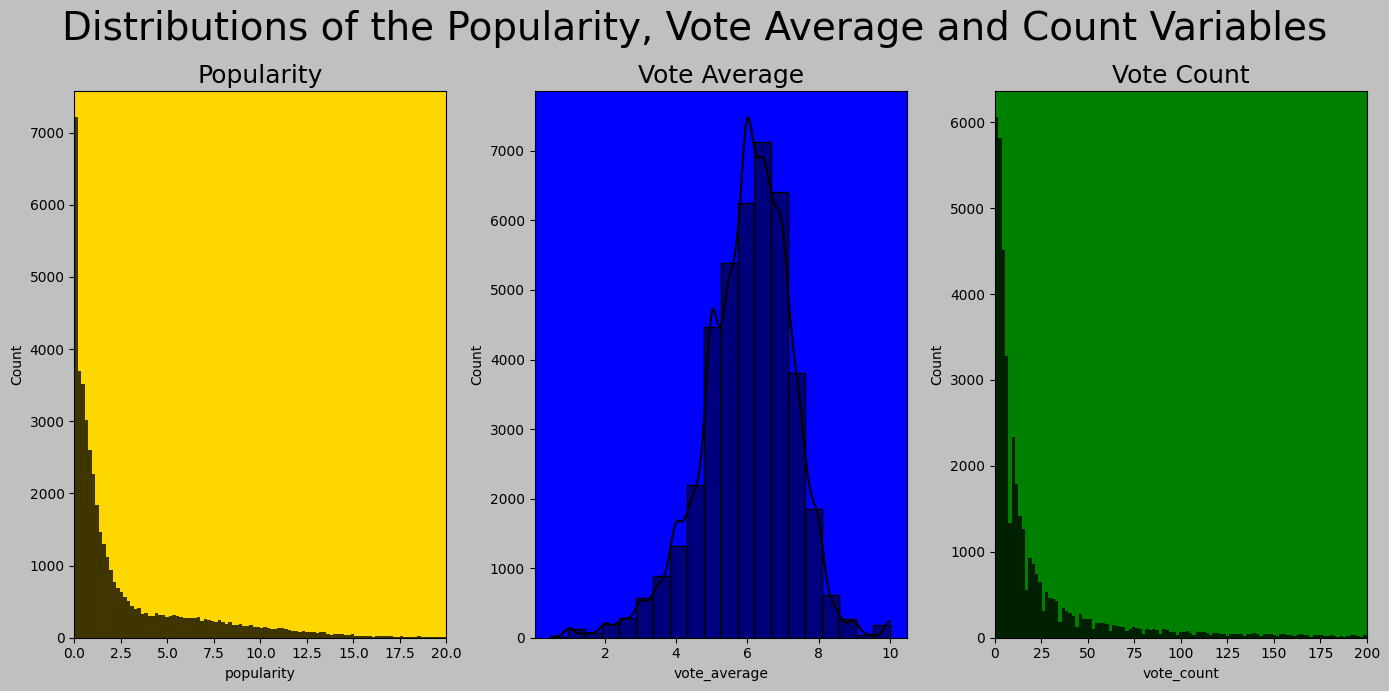

In [ ]:
movie_pop = movies[(movies['popularity'] != 0)]
movie_vote_avg = movies[movies['vote_average'] != 0]

fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(14,7))

ax1 = sns.histplot(movie_pop['popularity'],color='black',ax=ax1)
ax1.set_xlim(0,20)
ax1.set_title('Popularity',fontsize=18)
ax1.set_facecolor('gold')

ax2 = sns.histplot(movie_vote_avg['vote_average'],kde=True,color='black',bins=20,ax=ax2)
ax2.set_title('Vote Average',fontsize=18)
ax2.set_facecolor('blue')

ax3 = sns.histplot(movies['vote_count'],color='black',ax=ax3)
ax3.set_xlim(0,200)
ax3.set_title('Vote Count',fontsize=18)
ax3.set_facecolor('green')

fig.suptitle("Distributions of the Popularity, Vote Average and Count Variables",fontsize=28)

fig.set_facecolor('silver')
plt.tight_layout()

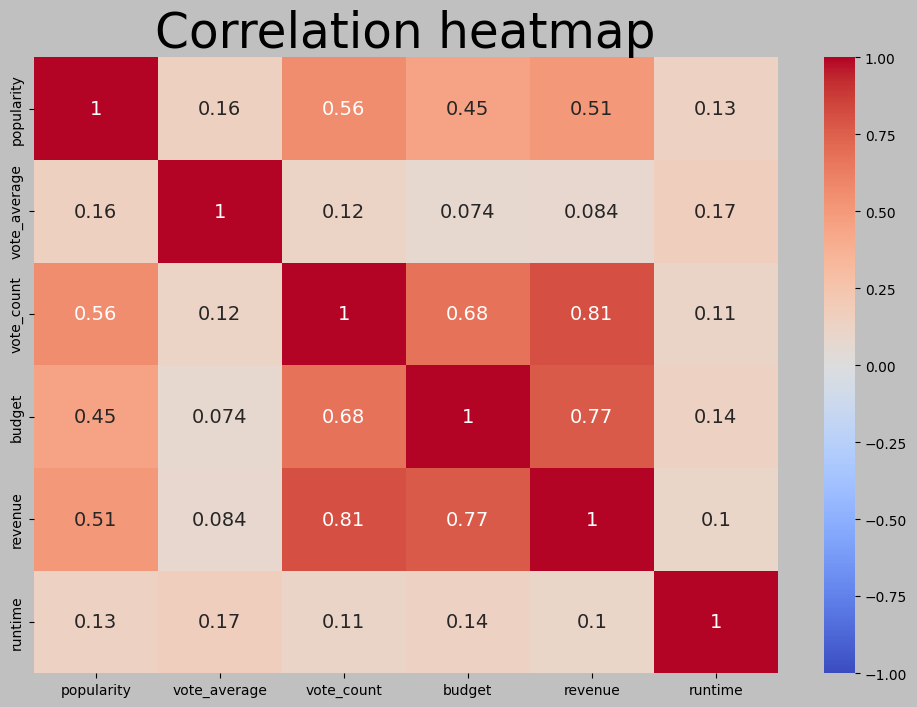

In [ ]:
movie_crr = movies[['popularity','vote_average','vote_count','budget','revenue','runtime']]

plt.figure(figsize=(12,8))
sns.heatmap(movie_crr.corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap='coolwarm',annot_kws={"fontsize":14})
sns.set(font_scale=2)
plt.title('Correlation heatmap',fontsize=35)

plt.gcf().patch.set_facecolor('silver')
plt.show();

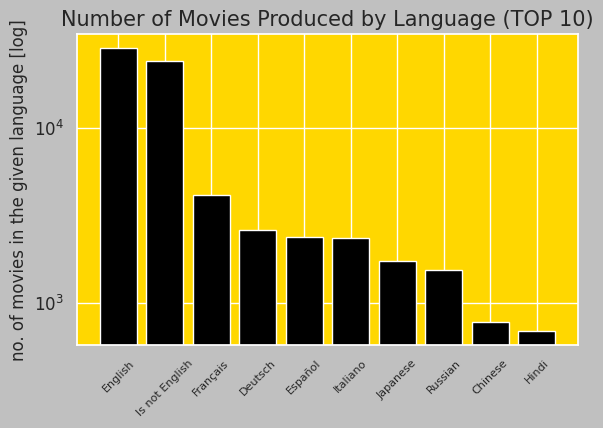

In [ ]:
movies_language = {}
movies_language['Is not English'] = 0

for language_list in movies['languages']:
    for language in language_list:
        if language not in movies_language:
            movies_language[language] = 0
        movies_language[language] += 1
        if language != 'English':
            movies_language['Is not English'] += 1

top10_language_hist = pd.DataFrame(movies_language.items(),columns=['language','no. of movies']).sort_values(['no. of movies'],ascending=False).head(10)

top10_language_hist = top10_language_hist.replace('日本語','Japanese')
top10_language_hist = top10_language_hist.replace('Pусский','Russian')
top10_language_hist = top10_language_hist.replace('普通话','Chinese')
top10_language_hist = top10_language_hist.replace('हिन्दी','Hindi')

plt.bar(x=top10_language_hist['language'],height=top10_language_hist['no. of movies'],color='black')

plt.xlabel('')
plt.ylabel('no. of movies in the given language [log]',fontsize=12)
plt.yscale('log')
plt.title('Number of Movies Produced by Language (TOP 10)',fontsize=15)
plt.xticks(fontsize=8,rotation=45)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.gcf().patch.set_facecolor('silver')
plt.gca().set_facecolor('gold')
plt.show()

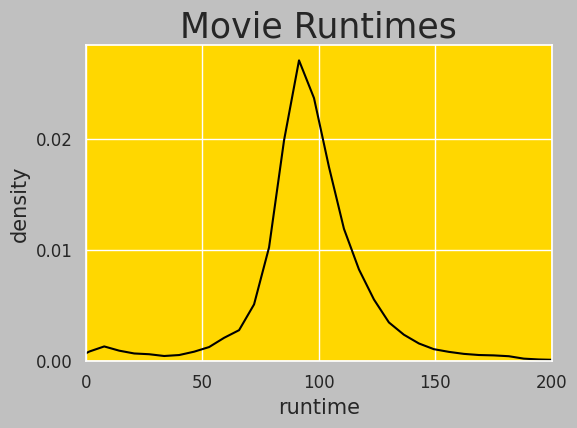

In [ ]:
sns.distplot(movies[movies['runtime'] != 0]['runtime'],color='black',hist=False)
plt.title('Movie Runtimes',fontsize=25)
plt.ylabel('density',fontsize=15)
plt.xlabel('runtime',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0,200)

plt.tight_layout()
plt.gcf().patch.set_facecolor('silver')
plt.gca().set_facecolor('gold')
plt.show()

The average movie runtime is around 90 minutes.